<a href="https://colab.research.google.com/github/mcbhavana27/ITS/blob/main/TCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from glob import glob
from keras.models import Sequential
from keras.metrics import MeanSquaredError as mae
from keras.layers import LSTM,Dense,Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split
from math import sqrt
#from bokeh.plotting import figure,output_file, show
import datetime
!pip install keras-tcn
from tcn import TCN
from tcn import tcn_full_summary
#from openpyxl import Workbook,load_workbook

     |████████████████████████████████| 1.1 MB 5.8 MB/s 
     |████████████████████████████████| 462 kB 59.5 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!cp  /content/drive/My\ Drive/DATA.zip /content/
!unzip DATA.zip

In [ ]:
filenames = glob('/content/DATA/402214'+'/*.csv')
print(filenames)

['/content/DATA/402214/5.csv', '/content/DATA/402214/4.csv', '/content/DATA/402214/7.csv', '/content/DATA/402214/2.csv', '/content/DATA/402214/1.csv', '/content/DATA/402214/11.csv', '/content/DATA/402214/10.csv', '/content/DATA/402214/9.csv', '/content/DATA/402214/12.csv', '/content/DATA/402214/3.csv', '/content/DATA/402214/8.csv', '/content/DATA/402214/6.csv', '/content/DATA/402214/13.csv']


In [ ]:
data = []
for filename in filenames:
    data.append(pd.read_csv(filename))
full_data =pd.concat(data,ignore_index=True)

In [ ]:
cols = list(full_data)[2]

In [ ]:
training_data=full_data[cols].astype(str)


In [ ]:
training_data = np.array(training_data).reshape(len(training_data),1)

In [ ]:
scaler =MinMaxScaler(feature_range=(0,1))
training_scaled = scaler.fit_transform(training_data)

In [ ]:
training_scaled[:15],training_scaled[15,-1]

(array([[0.17647059],
        [0.17647059],
        [0.16993464],
        [0.16339869],
        [0.15686275],
        [0.14379085],
        [0.1372549 ],
        [0.12418301],
        [0.11764706],
        [0.11111111],
        [0.10457516],
        [0.10457516],
        [0.09803922],
        [0.09150327],
        [0.09150327]]), 0.08496732026143791)

In [ ]:
n_steps = 30

In [ ]:
def split_set1(X):
    S = []
    HS= []
    i=0
    while i < len(X)-n_steps:
        l=[]
        l.append(X[i:n_steps+i])
        S.append(l)
        l=[]
        l.append(X[n_steps+i])
        HS.append(l)
        i+=1
    S=np.array(S)
    HS=np.array(HS)
    S=S.reshape(S.shape[0],S.shape[2],S.shape[3])
    HS=HS.reshape(HS.shape[0],HS.shape[1])
    return S,HS


In [ ]:
X,Y = split_set1(training_scaled)

In [ ]:
t_d=len(training_scaled)//5

In [ ]:
t_d

5238

In [ ]:
train_X,test_X,train_Y,test_Y = X[:-t_d],X[-t_d:-1],Y[:-t_d],Y[-t_d:-1]

In [ ]:
len(test_X)

5237

In [ ]:
test_Y=test_Y.reshape(test_Y.shape[0],1)

In [ ]:
train_Y.shape

(20925, 1)

In [ ]:
def Create_Model():
    Model=Sequential()
    Model.add(TCN(24,15,2,dilations=(1,2,4,8,16),padding = 'causal',use_skip_connections= True,activation ='relu',dropout_rate=.1,input_shape = (n_steps,1)))
    Model.add(Dense(10,activation='relu'))
    Model.add(Dense(1))
    Model.compile(optimizer="adam", loss = "mse")
    return Model


In [ ]:
model = Create_Model()

In [ ]:
history=model.fit(train_X,train_Y,epochs=100,validation_split=.15, verbose=1)

Epoch 1/100
556/556 [==============================] - 62s 103ms/step - loss: 0.0541 - val_loss: 0.0026
Epoch 2/100
556/556 [==============================] - 57s 103ms/step - loss: 0.0032 - val_loss: 0.0014
Epoch 3/100
556/556 [==============================] - 59s 107ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 4/100
556/556 [==============================] - 61s 109ms/step - loss: 0.0012 - val_loss: 0.0010
Epoch 5/100
556/556 [==============================] - 60s 108ms/step - loss: 8.5590e-04 - val_loss: 9.2502e-04
Epoch 6/100
556/556 [==============================] - 60s 107ms/step - loss: 6.7032e-04 - val_loss: 9.0069e-04
Epoch 7/100
556/556 [==============================] - 58s 105ms/step - loss: 5.5766e-04 - val_loss: 6.6703e-04
Epoch 8/100
556/556 [==============================] - 59s 106ms/step - loss: 5.0436e-04 - val_loss: 7.8929e-04
Epoch 9/100
556/556 [==============================] - 59s 107ms/step - loss: 4.2140e-04 - val_loss: 6.6331e-04
Epoch 10/100
556/556 [==

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn (TCN)                    (None, 24)                165048    
_________________________________________________________________
dense (Dense)                (None, 10)                250       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 165,309
Trainable params: 165,309
Non-trainable params: 0
_________________________________________________________________


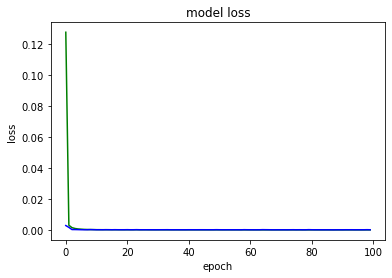

In [ ]:
plt.plot(history.history["loss"],color='green')
plt.plot(history.history["val_loss"],color='blue')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
y_predict_scaled =model.predict(test_X)

In [ ]:
y_predict_scaled.shape

(5237, 1)

In [ ]:
y_predict = scaler.inverse_transform(y_predict_scaled)

In [ ]:
test_Y = scaler.inverse_transform(test_Y)

In [ ]:
print(mae(y_predict,test_Y))


0.9815068054636263


In [ ]:
print(sqrt(mse(y_predict,test_Y)))

2.083161881250568


In [ ]:
print(mape(y_predict,test_Y))

0.023051195424683903


In [ ]:
print(y_predict[0])

[99.32752]


In [ ]:
len(test_X)

5237

In [ ]:
Error=[]
for i in range(len(test_Y)):
    Error.append(abs(y_predict[i]-test_Y[i]))

In [ ]:
wb = load_workbook('Test.xlsx')
ws = wb['TCN1']
ws = wb.active
for i in range(len(test_Y)):
    k=i+2
    ws['A'+str(k)]=test_Y[i][0]
    ws['B'+str(k)]=y_predict[i][0]
    ws['C'+str(k)]=Error[i][0]
wb.save('Test.xlsx')